In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz


In [6]:
## initializing

song_data = pd.read_csv("song_data.csv")
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [7]:
df = pd.DataFrame(song_data)

In [8]:
# sns.heatmap(song_data.corr(), cmap='cool')

Exploratory data analysis

In [9]:
df = df.drop_duplicates(subset='song_name')
df = df.sort_values('song_popularity', ascending=False)

/var/folders/9w/j89b4ts5173bcvfm_3hg0blc0000gn/T/ipykernel_21801/3516747564.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='danceability', y='song_popularity',data=df, palette='Dark2')


<Axes: xlabel='danceability', ylabel='song_popularity'>

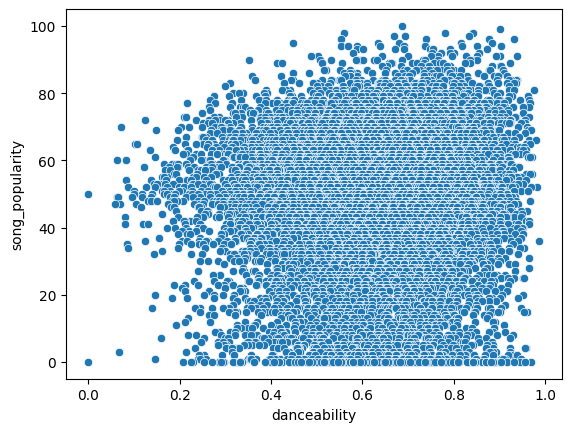

In [10]:
sns.scatterplot(x='danceability', y='song_popularity',data=df, palette='Dark2')

In [11]:
X = (df.drop(labels=['song_popularity', 'song_name'], axis=1)).to_numpy()
Y = (df.song_popularity).to_numpy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train, X_test, y_train, y_test)

[[2.29240e+05 3.68000e-01 5.83000e-01 ... 7.40080e+01 4.00000e+00
  3.88000e-01]
 [2.17644e+05 2.49000e-01 4.91000e-01 ... 1.61986e+02 3.00000e+00
  2.65000e-01]
 [1.72906e+05 8.08000e-01 6.83000e-01 ... 1.13424e+02 4.00000e+00
  6.45000e-01]
 ...
 [2.87920e+05 3.86000e-02 8.31000e-01 ... 9.39980e+01 4.00000e+00
  9.60000e-01]
 [1.74335e+05 3.71000e-01 9.00000e-01 ... 9.99640e+01 4.00000e+00
  4.88000e-01]
 [1.56000e+05 1.75000e-01 7.68000e-01 ... 1.19981e+02 4.00000e+00
  6.39000e-01]] [[2.12715e+05 6.73000e-01 3.81000e-01 ... 7.59880e+01 4.00000e+00
  4.38000e-01]
 [4.17188e+05 2.88000e-04 5.88000e-01 ... 1.35993e+02 4.00000e+00
  1.69000e-01]
 [1.88041e+05 3.08000e-04 2.85000e-01 ... 9.29850e+01 4.00000e+00
  5.75000e-01]
 ...
 [3.61750e+05 6.18000e-03 8.22000e-01 ... 1.25008e+02 4.00000e+00
  7.60000e-01]
 [1.57640e+05 6.29000e-01 5.78000e-01 ... 1.16128e+02 4.00000e+00
  8.08000e-01]
 [2.46600e+05 3.65000e-01 8.13000e-01 ... 9.29990e+01 4.00000e+00
  9.00000e-01]] [72 47 22 ... 55

In [13]:
# perform training with giniIndex
# Creating the classifier object 
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
# Fit the model 
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [14]:
# Function to calculate accuracy 
def cal_error(y_test, y_pred):
    print ("Mean Absolute Error : ", round(np.mean(abs(y_test - y_pred)), 2), 'degrees') 

In [15]:
def cal_accuracy(y_test, y_pred):
    errors = abs(y_pred - y_test)
    mape = 100 * (errors / (y_test + (y_test==0)))
    accuracy = abs(100 - np.mean(mape))
    print("Accuracy : ", round(accuracy, 2), '%')

In [16]:
# Operational Phase 
print("Results:")
# Prediction using gini 
y_pred = rf.predict(X_test)
cal_error(y_test, y_pred)
cal_accuracy(y_test, y_pred)

Results:
Mean Absolute Error :  15.65 degrees
Accuracy :  83.42 %
